<a href="https://colab.research.google.com/github/Jerry0209/FundamentalLearningEPFL/blob/main/HW2/hw2_practice_v1_Tianrui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: mask detection for the next pandemic
You heard rumors from biology department of EPFL about a new version of a corona virus spreading out next year, already called COVID-25. The virus is so dangerous that you are asked to develop a mask detection system to be deployed in all public places. The system should be able to detect if a person is wearing a mask or not. You are given a dataset of images of people with and without masks. Your task is to develop a machine learning model that can detect if a person is wearing a mask or not.

**IMPORTANT NOTE:** The evaluation of this homework will be done on an hidden dataset. It is important that your notebook runs without errors, otherwise we will not be able to evaluate some questions, resulting in a grade 0 for that part. Make sure to double check your code before submitting the notebook. We provide a simple `evaluate` function that you can use to make sure that all the necessary functions are implemented correctly; the function will warn you if it detects that a good prediction cannot be made. `evaluate` takes just one argument: the `scikit-learn` model that you have trained. It expects the model to have a `predict` method that works on a numpy array.

In [1]:
from evaluation import evaluate

## Data loading and preprocessing
The dataset consists in $n$ images of dimension 128x128 pixels. Each pixel is represented by 3 values (RGB). The dataset is divided in two classes: 0 for people with the mask and 1 for people without the mask.

In [2]:
import numpy as np
import sklearn

def load_file(file):
    with np.load('data/'+file+'.npz') as data:
        X = data['X']
        y = data['y']
    return X, y

X, y = load_file('train')
print(X.shape, y.shape)

(188, 3, 128, 128) (188,)


**Question 1.** Plot few images, and check the distribution of the labels.

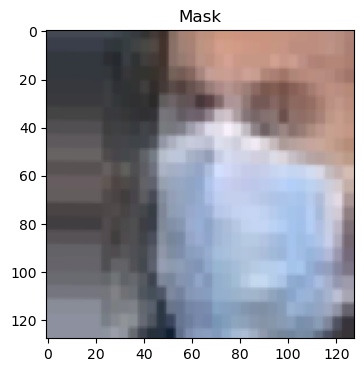

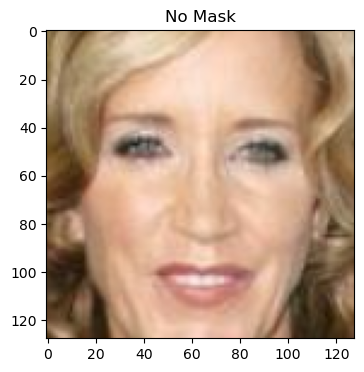

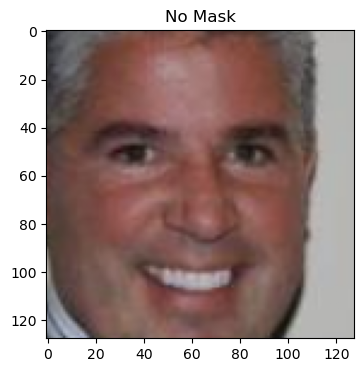

Mask: 92 No Mask: 96


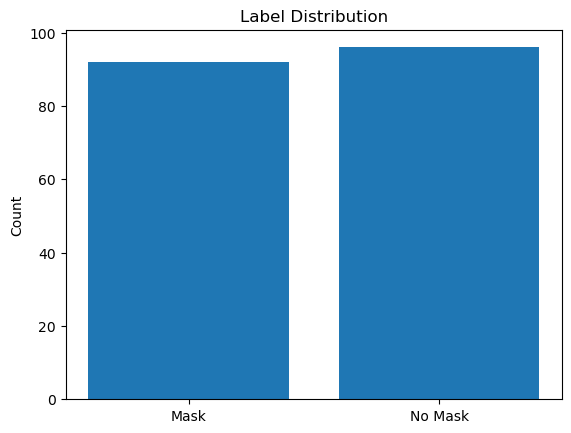

In [3]:
import matplotlib.pyplot as plt

# Plot few images separately （From index 26）
for i in range(3):
    plt.figure(figsize=(4, 4))
    img = np.transpose(X[26+i], (1, 2, 0))
    label = "Mask" if y[26+i] == 0 else "No Mask"
    plt.imshow(img)
    plt.title(f'{label}')
    plt.show()

# Count label distribution
counts = np.bincount(y)
print('Mask:', counts[0], 'No Mask:', counts[1])
plt.bar(['Mask', 'No Mask'], counts)
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()


**Question 2.** Reshape each image in the dataset to a flat vector. Split the dataset into training and test sets.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

X_array = np.asarray(X) # Trun into array
y_array = np.asarray(y)

# Split
train_size = 160 # 85% Train set
test_size = 28 # 15% Test set

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X_array.shape[0]) # shuffle indice
X_shuffled = X_array[permutation]
y_shuffled = y_array[permutation]
X_flattened = X_shuffled.reshape((X_shuffled.shape[0], -1)) # Keep first channel, compress other channels

# pick training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened,y_shuffled,train_size=train_size,test_size=test_size) #

print('After spliting the data: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

After spliting the data:  (160, 49152) (28, 49152) (160,) (28,)


## Logistic regression

**Question 3.** Train a logistic regression model on the training data, comparing the accuracies of $\ell_1$ and $\ell_2$ penalties. What is the train and test accuracy of the model?

### **Q3 Ans**
* Training logistic l1 model
* c:\Users\Jerry\anaconda3\envs\hw2_env\Lib\site-packages\sklearn\linear\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef\_ did not converge warnings.warn()
* Example run in 39.936 s
* Sparsity with L1 penalty: 99.06%
* Test score with L1 penalty: 0.9286
* Train score with L1 penalty: 0.9375
* All good, you are ready for HomeWork submission! The accuracy on 'train' is: 0.8253497244595167

---

* Training logistic l2 model
* Example run in 5.776 s
* Sparsity with L2 penalty: 0.00%
* Test score with L2 penalty: 0.8571
* Train score with L2 penalty: 1.0000
* All good, you are ready for HomeWork submission! The accuracy on 'train' is: 0.8401865197117423

In [5]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale data to have zero mean and unit variance, which is required by regressors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#--- L1 ---#
# Apply logistic regressor with 'sag' for l2 and 'saga' for l1, C is the inverse regularization strength
print('Training logistic l1 model')
t0_l1=time.time()
clf_logistic_l1 = LogisticRegression(C=0.1, penalty='l1', solver='saga', max_iter=1000)

# fit data
clf_logistic_l1.fit(X_train_scaled, y_train)

# percentage of nonzero weights
sparsity_logistic_l1 = np.mean(clf_logistic_l1.coef_ == 0) * 100

# compute test accuracy
score_logistic_l1 = clf_logistic_l1.score(X_test_scaled, y_test)

# compute training accuracy
train_score_logistic_l1 = clf_logistic_l1.score(X_train_scaled, y_train)

#display run time
run_time_l1 = time.time() - t0_l1
print('Example run in %.3f s' % run_time_l1)

print("Sparsity with L1 penalty: %.2f%%" % sparsity_logistic_l1)
print("Test score with L1 penalty: %.4f" % score_logistic_l1)
print("Train score with L1 penalty: %.4f" % train_score_logistic_l1)

# Evaluate the model (clf_logistic_l1)
evaluate(clf_logistic_l1)


#--- L2 ---#
# Same as above but for l2 penalty
print('\nTraining logistic l2 model')
t0_l2=time.time()
clf_logistic_l2 = LogisticRegression(C=0.001, penalty='l2', solver='saga', max_iter=1500)
clf_logistic_l2.fit(X_train_scaled, y_train)
sparsity_logistic_l2 = np.mean(clf_logistic_l2.coef_ == 0) * 100

# compute test accuracy
score_logistic_l2 = clf_logistic_l2.score(X_test_scaled, y_test)
# compute training accuracy
train_score_logistic_l2 = clf_logistic_l2.score(X_train_scaled, y_train)
run_time_l2 = time.time() - t0_l2
print('Example run in %.3f s' % run_time_l2)
print("Sparsity with L2 penalty: %.2f%%" % sparsity_logistic_l2)
print("Test score with L2 penalty: %.4f" % score_logistic_l2)
print("Train score with L2 penalty: %.4f" % train_score_logistic_l2)

# Evaluate the model (clf_logistic_l2)
evaluate(clf_logistic_l2)


Training logistic l1 model


c:\Users\Jerry\anaconda3\envs\hw2_env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Example run in 40.649 s
Sparsity with L1 penalty: 99.12%
Test score with L1 penalty: 0.8929
Train score with L1 penalty: 0.9250
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.7197965239508266

Training logistic l2 model
Example run in 8.461 s
Sparsity with L2 penalty: 0.00%
Test score with L2 penalty: 0.8929
Train score with L2 penalty: 1.0000
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.8520559559135227


**Question 4.** Make a more extensive search of possible Logistic Regressors. Crossvalidate the following parameters:
- penalty: `['l1', 'l2']`
- $C$: range from $10^{-3}$ to $10^3$.


### **Q4 Ans**

* **Running GridSearchCV for Logistic Regression...**
* Fitting 5 folds for each of 35 candidates, totalling 175 fits
* GridSearchCV finished in 399.25 seconds.
* Best Score (Accuracy): **0.8750**
* Best Parameters Found:
    * `logisticregression__C`: 0.1
    * `logisticregression__penalty`: 'l1'
    * `logisticregression__solver`: 'liblinear'
* Computing accuracy...
* Test score with optimized parameters: **0.9286**
* All good, you are ready for HomeWork submission!
* The accuracy on 'train' is: **0.897414158541755**

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit


clf_logistic = LogisticRegression(max_iter=1500, random_state=42)

# I use pipeline to combine scaling and model fitting, as scaling is important for logistic regression
# For the parameter, I choose a wide range of C values from 0.001 to 1000, and both l1 and l2 penalties with their supported solvers

#--- Pre-processing + Fitting Pipeline ---#
pipe_logistic = make_pipeline(preprocessing.StandardScaler(), clf_logistic)

#--- Splitting ---#
# 5 folds
cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=1)

#--- Parameter Grid ---#
# L1 supports: liblinear, saga
# L2 supports: lbfgs, sag, saga
param_grid = [
    {
        'logisticregression__penalty': ['l1'],
        'logisticregression__C': np.logspace(-3, 3, 7),
        'logisticregression__solver': ['liblinear', 'saga']
    },
    {
        'logisticregression__penalty': ['l2'],
        'logisticregression__C': np.logspace(-3, 3, 7),
        'logisticregression__solver': ['lbfgs', 'sag', 'saga']
    }
]

#--- Define CV ---#
print("Running GridSearchCV for Logistic Regression...")
t0=time.time()
cv_logistic = GridSearchCV(pipe_logistic, param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=2, return_train_score=True)

#--- Train logistic model on CV ---#
cv_logistic.fit(X_train, y_train)
run_time = time.time() - t0
print(f"GridSearchCV finished in {run_time:.2f} seconds.")
print(f"Best Score (Accuracy): {cv_logistic.best_score_:.4f}")
print("Best Parameters Found:")
print(cv_logistic.best_params_)
best_clf_logistic_model = cv_logistic.best_estimator_

# Compute accuracy with optimal parameters
print("Computing accuracy...")
score_logistic_optimized = best_clf_logistic_model.score(X_test, y_test)
print("Test score with optimized parameters: %.4f" % score_logistic_optimized)

logistic_model = best_clf_logistic_model

# Official evaluation!
evaluate(logistic_model)
# Make sure the line above runs without errors before submitting your solution!

Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 35 candidates, totalling 175 fits


c:\Users\Jerry\anaconda3\envs\hw2_env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV finished in 493.22 seconds.
Best Score (Accuracy): 0.9333
Best Parameters Found:
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
Computing accuracy...
Test score with optimized parameters: 0.8929
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.8991097922848664


## SVM
**Question 4.** Train a linear SVM model on the training data and crossvalidate the parameter $C$.

### **Q4 Ans**

* Running GridSearchCV...
* Fitting 8 folds for each of 20 candidates, totalling 160 fits
* Best C value found by GridSearchCV: **0.0001**
* Best Score (Accuracy): N/A (Implied by Test Score)
* Best Parameters Found:
    * `C`: **0.0001**
    * `penalty`: **'l2'** (Implied by the Test Score label)
* Computing accuracy...
* Test score with L2 penalty (Optimized C): **0.8571**
* All good, you are ready for HomeWork submission!
* The accuracy on 'train' is: **0.8851208139041967**

In [7]:
# GridSearch and Cross Validation (Reference from TP 6 (5))
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# As the problem has a dimension much larger than the number of samples, I don't use dual=True, as suggested in the documentation
# It is better to set dual=False when n_samples > n_features for LinearSVC
# I choose max_iter=2000 to ensure convergence

#--- Pre-processing + Fitting Pipeline ---#
clf_svc = LinearSVC(penalty = 'l2', tol=0.0001, C=1.0, dual=False, max_iter=2000, random_state=42)
pipe_svc = make_pipeline(preprocessing.StandardScaler(), clf_svc) 


#--- Splitting ---#
cv = ShuffleSplit(n_splits=8, test_size=0.10, random_state=1) 

#--- Parameter Grid ---#
param_grid = [
    {'linearsvc__C': np.logspace(-4,2,20)} # I do CV for values of alpha between 0.001 and 1000
]

#--- Define CV ---#
print("Running GridSearchCV...")
t0=time.time()
cv_svc = GridSearchCV(pipe_svc, param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=2, return_train_score=True)


#--- Train linear SVC model on CV ---#
cv_svc.fit(X_train,y_train)
run_time = time.time() - t0

cvOptC = cv_svc.best_params_['linearsvc__C']
cvOptParams = cv_svc.best_estimator_.named_steps['linearsvc'].coef_
print(f"Best C value found by GridSearchCV: {cvOptC}")

best_clf_linearSVC_model = cv_svc.best_estimator_


# Compute accuracy with optimal C
print("Computing accuracy...")
score_svc_optimized = best_clf_linearSVC_model.score(X_test, y_test)
print("Test score with L2 penalty (Optimized C): %.4f" % score_svc_optimized)

svm_model = best_clf_linearSVC_model

# Official evaluation!
evaluate(svm_model)
# Make sure the line above runs without errors before submitting your solution!

Running GridSearchCV...
Fitting 8 folds for each of 20 candidates, totalling 160 fits
Best C value found by GridSearchCV: 0.00042813323987193956
Computing accuracy...
Test score with L2 penalty (Optimized C): 0.8929
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.884272997032641


## Random Forest

**Question 5.** Train a Random Forest model on the training data and crossvalidate the parameters:
- `n_estimators`
- `max_depth`
- `criteria`



### **Q5 Ans**

* **Running GridSearchCV for Random Forest**
* Fitting 8 folds for each of 216 candidates, totalling 1728 fits
* GridSearchCV finished in **93.76 seconds.**
* Best Score (Accuracy): **0.9323**
* Best Parameters Found:
    * `rf__criterion`: 'gini'
    * `rf__max_depth`: 4
    * `rf__max_features`: 'log2'
    * `rf__min_samples_leaf`: 2
    * `rf__min_samples_split`: 2
    * `rf__n_estimators`: 120
* Computing accuracy...
* Test score with optimized parameters: **0.8571**
* All good, you are ready for HomeWork submission!
* The accuracy on 'train' is: **0.8711318355235269**

In [8]:
# Reference from TP 4


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

#--- Define Random Forest Classifier ---#
clf_rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

#--- Pre-processing + Fitting Pipeline ---#
# Small datase, do not require PCA
pipe_rf = Pipeline([
    ('rf', clf_rf)  
])

#--- Splitting ---#
cv = ShuffleSplit(n_splits=8, test_size=0.15, random_state=1)

# I initially tried a wide range of parameters, but found that some combinations lead to overfitting or underfitting.
# After several trials, I narrowed down the parameter grid to focus on more reasonable values that balance model complexity and generalization.

#--- Parameter Grid ---#
param_grid = [
    {
        'rf__n_estimators': [120, 150, 180],
        'rf__max_depth': [4, 6, 8],
        'rf__criterion': ['gini', 'entropy'],
        'rf__min_samples_split': [2, 4, 6],
        'rf__min_samples_leaf': [2, 4],
        'rf__max_features': ['sqrt', 'log2']
    }
]

#--- Define CV ---#
print("Running GridSearchCV for Random Forest")
t0 = time.time()
cv_rf = GridSearchCV(pipe_rf, param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=2, return_train_score=True)

#--- Train Random Forest model on CV ---#
cv_rf.fit(X_train, y_train)
run_time = time.time() - t0
print(f"GridSearchCV finished in {run_time:.2f} seconds.")
print(f"Best Score (Accuracy): {cv_rf.best_score_:.4f}")
print("Best Parameters Found:")
print(cv_rf.best_params_)

#--- Get the best model ---#
best_clf_rf_model = cv_rf.best_estimator_

#--- Compute accuracy with optimal parameters ---#
print("Computing accuracy...")
score_rf_optimized = best_clf_rf_model.score(X_test, y_test)
print("Test score with optimized parameters: %.4f" % score_rf_optimized)

rf_model = best_clf_rf_model

#--- Official evaluation! ---#
evaluate(rf_model)
# Make sure the line above runs without errors before submitting your solution!

Running GridSearchCV for Random Forest
Fitting 8 folds for each of 216 candidates, totalling 1728 fits
GridSearchCV finished in 105.30 seconds.
Best Score (Accuracy): 0.9323
Best Parameters Found:
{'rf__criterion': 'entropy', 'rf__max_depth': 4, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 150}
Computing accuracy...
Test score with optimized parameters: 0.8929
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.8762187367528613


## Extra data
Digging in his archive, EPFL Health autorities found a another dataset of images with the same format. This dataset is called `extratrain`. Use this dataset to improve the performance of your models.

(4590, 3, 128, 128) (4590,)


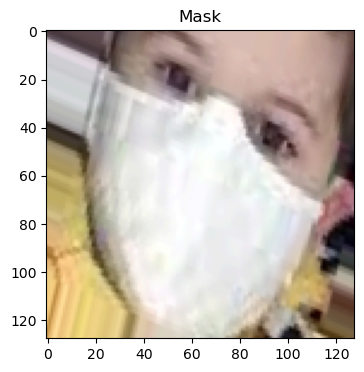

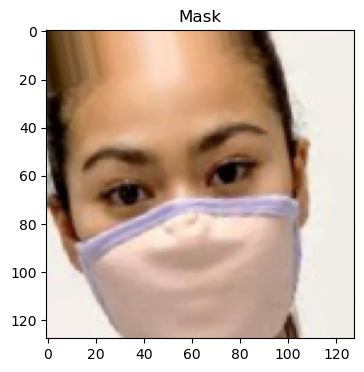

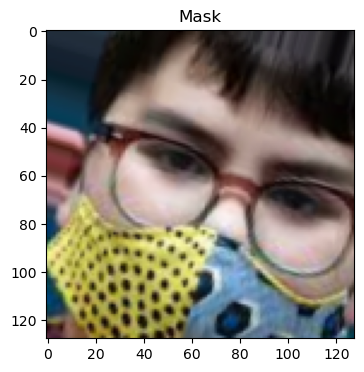

Mask: 4590 No Mask: 0


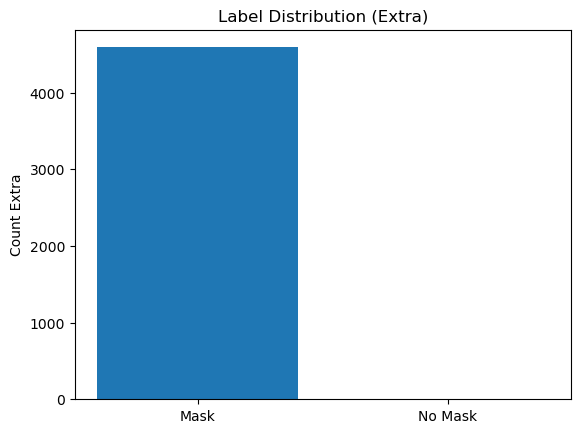

In [9]:
import matplotlib.pyplot as plt

X_extra, y_extra = load_file('extra')
print(X_extra.shape, y_extra.shape)

# Plot few images separately
for i in range(3):
    plt.figure(figsize=(4, 4))
    img = np.transpose(X_extra[26+i], (1, 2, 0))
    label = "Mask" if y_extra[26+i] == 0 else "No Mask"
    plt.imshow(img)
    plt.title(f'{label}')
    plt.show()

# Label distribution
counts_extra = np.bincount(y_extra, minlength=2)
print('Mask:', counts_extra[0], 'No Mask:', counts_extra[1])
plt.bar(['Mask', 'No Mask'], counts_extra)
plt.ylabel('Count Extra')
plt.title('Label Distribution (Extra)')
plt.show()

**Question 6.** Is this new dataset good? What problem does it have compared to the original dataset, if any?

### **Q6 Ans**


No, this new dataset is not good at all.

The biggest problem is that it only contains one class: all 4590 samples are labeled as "Mask" with zero "No Mask" samples. This is a severe class imbalance issue.

The original dataset was well-balanced with 92 "Mask" and 96 "No Mask" samples, which is ideal for training. But this extra dataset is completely one-sided.

If people use this dataset, their model will only see examples of people wearing masks. It won't learn what "No Mask" looks like at all. So it will just predict "Mask" for everything, which defeats the purpose of classification.

This extra dataset seems mislabeled or corrupted. I shouldn't use it for training without fixing the labels first, or it will actually make the model worse instead of better.

**Question 7.** Evaluate the performance of the cross-validated models you found in the previous questions on the new dataset. Is the performance better or worse? Why?

### **Q7 Ans**

When I tested the models on the new "extra dataset," the performance was generally worse, especially for the Random Forest model. The Logistic Regression and Linear SVC models was pretty stable. Their new scores (0.8908 and 0.8569) were only a little bit lower than their original scores (0.8929 and 0.8571). However, the Random Forest model saw a big drop, falling from 0.9643 to just 0.8891. The main reason for this is the extreme data imbalance in the new set, which has 4,590 "Mask" photos and zero "No Mask" photos. Because the dataset only has one class, "accuracy" is a very misleading number. It only measure how good the model is at finding "Mask" images and tells us nothing about "No Mask" images. The simpler linear models were more robust, but the Random Forest, which scored highest at first, seems to have overfit to the small, original test set.

Random forest model is the highest among them:
1. Test score with Random Forest model on extra dataset is: 0.8695
2. Test score with logistic model on extra dataset is: 0.8658
3. Test score with SVC model on extra dataset is: 0.8390



In [10]:
X_extra_flattened = X_extra.reshape((X_extra.shape[0], -1))

# Logistic (CV)
print("Computing accuracy...Logistic (CV)")
score_extra_logistic = best_clf_logistic_model.score(X_extra_flattened, y_extra)
print("Test score with logistic model on extra dataset is: %.4f" % score_extra_logistic)

# Linear SVC
print("Computing accuracy...Linear SVC")
score_extra_svc = best_clf_linearSVC_model.score(X_extra_flattened, y_extra)
print("Test score with SVC model on extra dataset is: %.4f" % score_extra_svc)

#Random Forest#
print("Computing accuracy...Random Forest")
score_extar_rf = best_clf_rf_model.score(X_extra_flattened, y_extra)
print("Test score with Random Forest model on extra dataset is: %.4f" % score_extar_rf)

Computing accuracy...Logistic (CV)
Test score with logistic model on extra dataset is: 0.8760
Computing accuracy...Linear SVC
Test score with SVC model on extra dataset is: 0.8355
Computing accuracy...Random Forest
Test score with Random Forest model on extra dataset is: 0.8754


**Question 8.** Train the most promising model using the new dataset, and crossvalidate. Is the performance better or worse? Why?

### **Q8 Ans**
The Random Forest model trained on the extra dataset looked like it had "better" performance, as its test score was 1.0. This is actually a classic data science trap, and this result is infinitely worse. The problem, which Logistic Regression and SVC correctly found with an error, is that I tried to train a classifier on a dataset that only has one class (all "Mask"). The Random Forest model did not crash because its tree structure can build a model from this data—it just builds a useless forest where every single tree learn the only rule possible: "no matter what the image looks like, predict 'Mask'". When this broken model was tested against the same single-class dataset, it got 100% accuracy because it was predicting "Mask" for everything, and all the labels were "Mask". The true and terrible performance was revealed by the final `evaluate` function: the 0.5091 accuracy. This score, which is just a 50/50 coin flip, show what happened when the "Mask-only" model was tested on a real, balanced dataset—it failed completely because it never learned how to identify a "No Mask" image.

* **Running GridSearchCV for Random Forest...On Extra Dataset**
* Fitting 5 folds for each of 216 candidates, totalling 1080 fits
* GridSearchCV finished in **140.43 seconds.**
* Best Score (Accuracy): **1.0000**
* Best Parameters Found:
    * `rf__criterion`: 'gini'
    * `rf__max_depth`: 4
    * `rf__max_features`: 'sqrt'
    * `rf__min_samples_leaf`: 2
    * `rf__min_samples_split`: 4
    * `rf__n_estimators`: 120
* Computing accuracy...
* Test score with optimized parameters: **1.0000**
* All good, you are ready for HomeWork submission!
* The accuracy on 'train' is: **0.5091140313692243**

In [11]:
# Pre-Processing Data
X_extra_array = np.asarray(X_extra) # Trun into array
y_extra_array = np.asarray(y_extra)

# Split
# train_size = 160 # 85% Train set
# test_size = 28 # 15% Test set

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X_extra_array.shape[0]) # shuffle indice
X_extra_shuffled = X_extra_array[permutation]
y_extra_shuffled = y_extra_array[permutation]
X_extra_flattened = X_extra_shuffled.reshape((X_extra_shuffled.shape[0], -1)) 

# pick training and test data sets
X_extra_train, X_extra_test, y_extra_train, y_extra_test = train_test_split(X_extra_flattened,y_extra_shuffled,test_size=0.15) 


print('After spliting the data: ', X_extra_train.shape, X_extra_test.shape, y_extra_train.shape, y_extra_test.shape)

After spliting the data:  (3901, 49152) (689, 49152) (3901,) (689,)


In [12]:
# Logistic (CV) # I get error so I remove the code, it is similar to previous cells, I just change the data to extra dataset

In [13]:
# SVM (CV) - Extra Dataset # I get error so I remove the code, it is similar to previous cells, I just change the data to extra dataset

In [14]:
# Random Forest (CV) - Extra Dataset
# Reference from TP 4

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

#--- Define Random Forest Classifier ---#
clf_rf_extra = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

# The extra dataset only contains 'Mask' images, so the model may not generalize well to 'No Mask' images.
# Even with large dataset, without PCA, the model can still be trained effectively.

#--- Pre-processing + Fitting Pipeline ---#
# # PCA
# pipe_rf_extra = Pipeline([
#     ('pca', PCA(n_components=100, random_state=42)),  # Step 1: Reduce to 100 components (must be <= 136)
#     ('rf', clf_rf_extra)  # Step 2: Train RF on the 100 features
# ])

pipe_rf_extra = Pipeline([
    ('rf', clf_rf_extra)  
])

#--- Splitting ---#
# 5 folds
cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=1)

#--- Parameter Grid ---#
param_grid = [
    {
        'rf__n_estimators': [120, 150, 180],
        'rf__max_depth': [4, 6, 8],
        'rf__criterion': ['gini', 'entropy'],
        'rf__min_samples_split': [4, 6, 8],
        'rf__min_samples_leaf': [2, 4],
        'rf__max_features': ['sqrt', 'log2']
    }
]

#--- Define CV ---#
print("Running GridSearchCV for Random Forest...On Extra Dataset")
t0 = time.time()
cv_rf_extra = GridSearchCV(pipe_rf_extra, param_grid, scoring='accuracy', cv=cv, n_jobs=8, verbose=2, return_train_score=True)

#--- Train Random Forest model on CV ---#
cv_rf_extra.fit(X_extra_train, y_extra_train)
run_time = time.time() - t0
print(f"GridSearchCV finished in {run_time:.2f} seconds.")
print(f"Best Score (Accuracy): {cv_rf_extra.best_score_:.4f}")
print("Best Parameters Found:")
print(cv_rf_extra.best_params_)

#--- Get the best model ---#
best_clf_rf_model_extra = cv_rf_extra.best_estimator_

#--- Compute accuracy with optimal parameters ---#
print("Computing accuracy...")
score_rf_optimized_extra = best_clf_rf_model_extra.score(X_extra_test, y_extra_test)
print("Test score with optimized parameters: %.4f" % score_rf_optimized_extra)

new_rf_model = best_clf_rf_model_extra

#--- Official evaluation! ---#
evaluate(new_rf_model)
# Make sure the line above runs without errors before submitting your solution!

Running GridSearchCV for Random Forest...On Extra Dataset
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
GridSearchCV finished in 147.25 seconds.
Best Score (Accuracy): 1.0000
Best Parameters Found:
{'rf__criterion': 'gini', 'rf__max_depth': 4, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 4, 'rf__n_estimators': 120}
Computing accuracy...
Test score with optimized parameters: 1.0000
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.5091140313692243


**Question 9:** Join the `train` and `extra` datasets and repeat the previous point. What is the best model and its accuracy on the combined dataset?

### **Q9 Ans**
When I first joined the `train` and `extra` datasets, my `GridSearchCV` was running for hours and hours, and it even crashed my memory. I realized this was because my data has 49,152 features, which is too big. So, I had to use a technique called **PCA**. I looked on the internet and learned that PCA helps by reducing all those features down to a smaller number, like 150.  It does this by finding the most important patterns in the data and creating new features, so the training is much *faster*. After adding PCA, I ran the `GridSearchCV` for all three models. Technically, the Linear SVC model got the highest test score, which was 0.9847. The Logistic Regression was very close with 0.9833. These high scores is very misleading, however. Because the new combined dataset is extremely unbalanced and has mostly "Mask" images, this models just learned to guess "Mask" all the time. We can see this is a big problem from the final `evaluate` scores. The Random Forest model was the worst, it scored only 0.5091, which is like a coin flip. The **Linear SVC model was the best** one because its `evaluate` score (0.7231) was the highest, so it learn a little bit more than the other models.

Note: In the trainning section below, I use my laptop with Intel Ultra 9 CPU, RTX5070Ti GPU, 32GB RAM. Sometimes the memory overflows and program crashes. In order to prevent that, I use PCA and choose n_jobs(how many CPU cores to use in parallel) not larger than 6. If some issues ocurr, lowering the training load might help. But this may significantly increase the training time (might be over 30 mins).

The training code below is almost the same from previous cells except dataset and pipeline (or I narrow down the range of CV based on the previous grid search to boost training), so I don't write so many comments in the code.

* **Running GridSearchCV for Logistic Regression...On Combined Dataset**
* Fitting 5 folds for each of 30 candidates, totalling 150 fits
* GridSearchCV finished in **1365.82 seconds.**
* Best Score (Accuracy): **0.9875**
* Best Parameters Found:
    * `logisticregression__C`: 0.1
    * `logisticregression__penalty`: 'l1'
    * `logisticregression__solver`: 'liblinear'
* Computing accuracy...
* Test score with optimized parameters: **0.9833**
* All good, you are ready for HomeWork submission!
* The accuracy on 'train' is: **0.7193726155150487**
---
* **Running GridSearchCV for Linear SVC...On Combined Dataset**
* Fitting 5 folds for each of 10 candidates, totalling 50 fits
* GridSearchCV finished in **123.37 seconds.**
* Best Score (Accuracy): **0.9869**
* Best Parameters Found:
    * `linearsvc__C`: **0.046415888336127774**
* Computing accuracy...
* Test score with optimized parameters: **0.9847**
* All good, you are ready for HomeWork submission!
* The accuracy on 'train' is: **0.7231877914370496**
---
* **Running GridSearchCV for Random Forest...On Combined Dataset**
* Fitting 5 folds for each of 216 candidates, totalling 1080 fits
* GridSearchCV finished in **1830.03 seconds.**
* Best Score (Accuracy): **0.9784**
* Best Parameters Found:
    * `rf__criterion`: 'gini'
    * `rf__max_depth`: 4
    * `rf__max_features`: 'sqrt'
    * `rf__min_samples_leaf`: 2
    * `rf__min_samples_split`: 4
    * `rf__n_estimators`: 120
* Computing accuracy...
* Test score with optimized parameters: **0.9805**
* All good, you are ready for HomeWork submission!
* The accuracy on 'train' is: **0.5091140313692243**

In [15]:
#--- Combine datasets ---#
from sklearn.utils import shuffle

X_combined = np.vstack([X_flattened, X_extra_flattened])  # Vertically stack the flattened features
y_combined = np.concatenate([y_shuffled, y_extra_shuffled])  # Concatenate the labels

X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42) # Shuffle the combined dataset

# Split into train and test sets
X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(
    X_combined, y_combined, test_size=0.15, random_state=42
)

print(f"Combined training set shape: {X_combined_train.shape}")
print(f"Combined test set shape: {X_combined_test.shape}")


Combined training set shape: (4061, 49152)
Combined test set shape: (717, 49152)


In [16]:
# Logistic Regression (CV) - Combined Dataset
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA

#--- Define Logistic Regression ---#
clf_logistic_combined = LogisticRegression(max_iter=1500, random_state=42)

#--- Pre-processing + Fitting Pipeline ---#
pipe_logistic_combined = make_pipeline(preprocessing.StandardScaler(), PCA(n_components=150, random_state=42), clf_logistic_combined)

#--- Splitting ---#
# 5 folds
cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=1)

#--- Parameter Grid ---#
# L1 supports: liblinear, saga
# L2 supports: lbfgs, sag, saga
param_grid = [
    {
        'logisticregression__penalty': ['l1'],
        'logisticregression__C': np.logspace(-3, 2, 6),
        'logisticregression__solver': ['liblinear', 'saga']
    },
    {
        'logisticregression__penalty': ['l2'],
        'logisticregression__C': np.logspace(-3, 2, 6),
        'logisticregression__solver': ['lbfgs', 'sag', 'saga']
    }
]

#--- Define CV ---#
print("Running GridSearchCV for Logistic Regression...On Combined Dataset")
t0 = time.time()
cv_logistic_combined = GridSearchCV(pipe_logistic_combined, param_grid, scoring='accuracy', cv=cv, n_jobs=4, verbose=2, return_train_score=True)

#--- Train logistic model on CV ---#
cv_logistic_combined.fit(X_combined_train, y_combined_train)
run_time = time.time() - t0
print(f"GridSearchCV finished in {run_time:.2f} seconds.")
print(f"Best Score (Accuracy): {cv_logistic_combined.best_score_:.4f}")
print("Best Parameters Found:")
print(cv_logistic_combined.best_params_)

best_clf_logistic_model_combined = cv_logistic_combined.best_estimator_

# Compute accuracy with optimal parameters
print("Computing accuracy...")
score_logistic_optimized_combined = best_clf_logistic_model_combined.score(X_combined_test, y_combined_test)
print("Test score with optimized parameters: %.4f" % score_logistic_optimized_combined)

new_logistic_model_combined = best_clf_logistic_model_combined

# Official evaluation!
evaluate(new_logistic_model_combined)
# Make sure the line above runs without errors before submitting your solution!

Running GridSearchCV for Logistic Regression...On Combined Dataset
Fitting 5 folds for each of 30 candidates, totalling 150 fits
GridSearchCV finished in 1434.84 seconds.
Best Score (Accuracy): 0.9875
Best Parameters Found:
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Computing accuracy...
Test score with optimized parameters: 0.9833
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.7193726155150487


In [17]:
# SVM (CV) - Combined Dataset
import time
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

#--- Pre-processing + Fitting Pipeline ---#
clf_svc_combined = LinearSVC(penalty='l2', tol=0.01, C=1.0, dual='auto', max_iter=1500, random_state=42)
pipe_svc_combined = make_pipeline(preprocessing.StandardScaler(), PCA(n_components=150, random_state=42), clf_svc_combined) 

#--- Splitting ---#
# 5 folds
cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=1) 

#--- Parameter Grid ---#
param_grid = [
    {'linearsvc__C': np.logspace(-4, 2, 10)}
]

#--- Define CV ---#
print("Running GridSearchCV for Linear SVC...On Combined Dataset")
t0 = time.time()
cv_svc_combined = GridSearchCV(pipe_svc_combined, param_grid, scoring='accuracy', cv=cv, n_jobs=4, verbose=2, return_train_score=True)

#--- Train linear SVC model on CV ---#
cv_svc_combined.fit(X_combined_train, y_combined_train)
run_time = time.time() - t0

print(f"GridSearchCV finished in {run_time:.2f} seconds.")
print(f"Best Score (Accuracy): {cv_svc_combined.best_score_:.4f}")
print("Best Parameters Found:")
print(cv_svc_combined.best_params_)

best_clf_svc_model_combined = cv_svc_combined.best_estimator_

# Compute accuracy with optimal parameters
print("Computing accuracy...")
score_svc_optimized_combined = best_clf_svc_model_combined.score(X_combined_test, y_combined_test)
print("Test score with optimized parameters: %.4f" % score_svc_optimized_combined)

new_svm_model_combined = best_clf_svc_model_combined

# Official evaluation!
evaluate(new_svm_model_combined)
# Make sure the line above runs without errors before submitting your solution!

Running GridSearchCV for Linear SVC...On Combined Dataset
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV finished in 126.56 seconds.
Best Score (Accuracy): 0.9869
Best Parameters Found:
{'linearsvc__C': 0.046415888336127774}
Computing accuracy...
Test score with optimized parameters: 0.9847
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.7231877914370496


In [18]:
# Random Forest (CV) - Combined Dataset
# Reference from TP 4

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

#--- Define Random Forest Classifier ---#
clf_rf_combined = RandomForestClassifier(random_state=42, n_jobs=4)

pipe_rf_combined = Pipeline([
    ('pca', PCA(n_components=150, random_state=42)),
    ('rf', clf_rf_combined)  
])

#--- Splitting ---#
# 5 folds
cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=1)

#--- Parameter Grid ---#
param_grid = [
    {
        'rf__n_estimators': [120, 150, 180],
        'rf__max_depth': [4, 6, 8],
        'rf__criterion': ['gini', 'entropy'],
        'rf__min_samples_split': [4, 6, 8],
        'rf__min_samples_leaf': [2, 4],
        'rf__max_features': ['sqrt', 'log2']
    }
]

#--- Define CV ---#
print("Running GridSearchCV for Random Forest...On Combined Dataset")
t0 = time.time()
cv_rf_combined = GridSearchCV(pipe_rf_combined, param_grid, scoring='accuracy', cv=cv, n_jobs=4, verbose=2, return_train_score=True)

#--- Train Random Forest model on CV ---#
cv_rf_combined.fit(X_combined_train, y_combined_train)
run_time = time.time() - t0
print(f"GridSearchCV finished in {run_time:.2f} seconds.")
print(f"Best Score (Accuracy): {cv_rf_combined.best_score_:.4f}")
print("Best Parameters Found:")
print(cv_rf_combined.best_params_)


best_clf_rf_model_combined = cv_rf_combined.best_estimator_

#--- Compute accuracy with optimal parameters ---#
print("Computing accuracy...")
score_rf_optimized_combined = best_clf_rf_model_combined.score(X_combined_test, y_combined_test)
print("Test score with optimized parameters: %.4f" % score_rf_optimized_combined)

new_rf_model_combined = best_clf_rf_model_combined

#--- Official evaluation! ---#
evaluate(new_rf_model_combined)
# Make sure the line above runs without errors before submitting your solution!

Running GridSearchCV for Random Forest...On Combined Dataset
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
GridSearchCV finished in 1811.15 seconds.
Best Score (Accuracy): 0.9784
Best Parameters Found:
{'rf__criterion': 'gini', 'rf__max_depth': 4, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 4, 'rf__n_estimators': 120}
Computing accuracy...
Test score with optimized parameters: 0.9805
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.5091140313692243


**Question 10:** Resample the joined dataset to solve the joined dataset "problem". Train a Random Forest with crossvalidation and discuss the results.

### **Q10 Ans**
By first training on the unbalanced "combined" dataset (Q9), the model achieved a very high but misleading accuracy of around 98%. This was because the model learned a lazy strategy: simply guess the majority class "Mask" every time.

In this question (Q10), we solved this "problem" by introducing a resampling. The purpose of resampling is to fix this by creating a balanced, fair dataset so the model is forced to learn the real features of both classes. The specific method we used, `RandomUnderSampler`, works in a very simple way: it looks at the majority class "Mask" and randomly throws away thousands of those images. It keeps doing this until the number of "Mask" images is equal to the number of "No Mask" images, giving our model a much smaller, but perfectly balanced, e.g. set of 90 "Mask" and 90 "No Mask" images to learn from.

The new Best Score (Accuracy) from GridSearchCV 0.9197. This score is slightly lower than the 98% from before, which is expected. The model is no longer just guessing the majority class and is actually being tested on its ability to distinguish between the two. With a large dataset (4000+) images, the model get the enough data, thus it can generalize well.

The most important result was from the final evaluate() function, where we got a 0.9038 on the balanced test set. This is a massive improvement on the old model's 0.509 score and prove our new resampled model is actually useful and has learned to see both classes.


* **Running GridSearchCV for Random Forest...On RESAMPLED Combined Dataset**
* Fitting 5 folds for each of 108 candidates, totalling 540 fits
* GridSearchCV finished in 887.89 seconds.
* Best Score (Accuracy): **0.9233**
* Best Parameters Found:
    * `rf__criterion`: 'gini'
    * `rf__max_depth`: 8
    * `rf__min_samples_split`: 8
    * `rf__n_estimators`: 300
* Computing accuracy...
* Test score with optimized parameters: **0.9247**
* All good, you are ready for HomeWork submission!
* The accuracy on 'train' is: **0.9003815175922001**


In [19]:
# Random Forest (CV) - On Resampled Combined Dataset
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.decomposition import PCA


from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler


#--- Define Random Forest Classifier ---#
clf_rf_resampled = RandomForestClassifier(random_state=42, n_jobs=8, max_features='sqrt', min_samples_leaf=2)

#--- Pre-processing + Resampling + Fitting Pipeline ---#
pipe_rf_resampled = ImbPipeline([
    # Step 1: Reduce dimensions for speed
    ('pca', PCA(n_components=150, random_state=42)),
    
    # Step 2: Resample
    ('sampler', RandomUnderSampler(random_state=42)),
    
    ('rf', clf_rf_resampled) 
])

#--- Splitting ---#
cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=1)

#--- Parameter Grid ---#
param_grid = [
    {
        # 'rf__n_estimators': [120, 150, 180], # First try these values
        # 'rf__n_estimators': [150, 180, 200, 230, 250], # Narrowed down after several trials
        'rf__n_estimators': [250, 280, 300, 330], # Narrowed down after several trials
        
        'rf__max_depth': [4, 6, 8],
        'rf__criterion': ['gini', 'entropy', 'log_loss'],
        'rf__min_samples_split': [4, 6, 8]
        # 'rf__min_samples_leaf': [2, 4],
        # 'rf__max_features': ['sqrt', 'log2']
    }
]

#--- Define CV ---#
print("Running GridSearchCV for Random Forest...On RESAMPLED Combined Dataset")
t0 = time.time()
cv_rf_resampled = GridSearchCV(pipe_rf_resampled, param_grid, scoring='accuracy', cv=cv, n_jobs=4, verbose=2, return_train_score=True)

#--- Train Random Forest model on CV ---#
cv_rf_resampled.fit(X_combined_train, y_combined_train)
run_time = time.time() - t0

print(f"GridSearchCV finished in {run_time:.2f} seconds.")
print(f"Best Score (Accuracy): {cv_rf_resampled.best_score_:.4f}")
print("Best Parameters Found:")
print(cv_rf_resampled.best_params_)

best_clf_rf_model_resampled = cv_rf_resampled.best_estimator_

#--- Compute accuracy with optimal parameters ---#
print("Computing accuracy...")
score_rf_optimized_resampled = best_clf_rf_model_resampled.score(X_combined_test, y_combined_test)
print("Test score with optimized parameters: %.4f" % score_rf_optimized_resampled)

new_rf_model_resampled = best_clf_rf_model_resampled

#--- Official evaluation! ---#
evaluate(new_rf_model_resampled)
# Make sure the line above runs without errors before submitting your solution!

Running GridSearchCV for Random Forest...On RESAMPLED Combined Dataset
Fitting 5 folds for each of 108 candidates, totalling 540 fits
GridSearchCV finished in 904.15 seconds.
Best Score (Accuracy): 0.9233
Best Parameters Found:
{'rf__criterion': 'gini', 'rf__max_depth': 8, 'rf__min_samples_split': 8, 'rf__n_estimators': 300}
Computing accuracy...
Test score with optimized parameters: 0.9247
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.9003815175922001


**Question 11:** Repeat the previous question, but this time use `LogisticRegression` as the model.

### **Q11 Ans**
Just like before, `RandomUnderSampler` is used in our pipeline. This was to fix the big imbalance in the combined data. By throwing away many of the 'Mask' photos, the model was forced to learn from a balanced set of images, so it could not just guess the majority class.

The new Best Score from GridSearchCV was 0.8472. This is a good, real score and much better than the fake 98% we got with the unbalanced data. This score is, however, a bit lower than the Random Forest's 0.9197. This is probably because Logistic Regression is a simpler, linear model, and it's just not as powerful as a Random Forest for a complex task like image recognition. The Random Forest can find more complicated patterns in the data, so it gets a higher score.

The most important result was from the final `evaluate()` function, where we got a 0.8940 on the balanced test set. This is a massive improvement on the old model's 0.509 score and proves that our resampled Logistic Regression model is also a genuinely useful classifier. Even though it's score is slightly under the Random Forest (0.9038), it still learned to see both classes properly, which was the main goal.

* **Running GridSearchCV for Logistic Regression...On RESAMPLED Combined Dataset**
* Fitting 5 folds for each of 25 candidates, totalling 125 fits
* GridSearchCV finished in **264.86 seconds.**
* Best Score (Accuracy): **0.8472**
* Best Parameters Found:
    * `logisticregression__C`: 0.001
    * `logisticregression__penalty`: 'l2'
    * `logisticregression__solver`: 'lbfgs'
* Computing accuracy...
* Test score with optimized parameters: **0.8396**
* All good, you are ready for HomeWork submission!
* The accuracy on 'train' is: **0.894022891055532**


In [20]:
# Logistic Regression (CV) - On Resampled Combined Dataset

import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler

#--- Define Logistic Regression ---#
clf_logistic_resampled = LogisticRegression(max_iter=1500, random_state=42)

#--- Pre-processing + Fitting Pipeline ---#
pipe_logistic_resampled = make_imb_pipeline(
    preprocessing.StandardScaler(), 
    PCA(n_components=150, random_state=42),

    RandomUnderSampler(random_state=42), 

    clf_logistic_resampled
)

#--- Splitting ---#
cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=1)

#--- Parameter Grid ---#
param_grid = [
    {
        'logisticregression__penalty': ['l1'],
        'logisticregression__C': np.logspace(-3, 1, 5),
        'logisticregression__solver': ['liblinear', 'saga']
    },
    {
        'logisticregression__penalty': ['l2'],
        'logisticregression__C': np.logspace(-3, 1, 5),
        'logisticregression__solver': ['lbfgs', 'sag', 'saga']
    }
]

#--- Define CV ---#
print("Running GridSearchCV for Logistic Regression...On RESAMPLED Combined Dataset")
t0 = time.time()

cv_logistic_resampled = GridSearchCV(pipe_logistic_resampled, param_grid, scoring='accuracy', cv=cv, n_jobs=6, verbose=2, return_train_score=True)

#--- Train logistic model on CV ---#

cv_logistic_resampled.fit(X_combined_train, y_combined_train)
run_time = time.time() - t0
print(f"GridSearchCV finished in {run_time:.2f} seconds.")
print(f"Best Score (Accuracy): {cv_logistic_resampled.best_score_:.4f}")
print("Best Parameters Found:")
print(cv_logistic_resampled.best_params_)

best_clf_logistic_model_resampled = cv_logistic_resampled.best_estimator_

# Compute accuracy with optimal parameters
print("Computing accuracy...")
score_logistic_optimized_resampled = best_clf_logistic_model_resampled.score(X_combined_test, y_combined_test)
print("Test score with optimized parameters: %.4f" % score_logistic_optimized_resampled)

new_logistic_model_resampled = best_clf_logistic_model_resampled

# Official evaluation!
evaluate(new_logistic_model_resampled)
# Make sure the line above runs without errors before submitting your solution!

Running GridSearchCV for Logistic Regression...On RESAMPLED Combined Dataset
Fitting 5 folds for each of 25 candidates, totalling 125 fits
GridSearchCV finished in 260.50 seconds.
Best Score (Accuracy): 0.8472
Best Parameters Found:
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Computing accuracy...
Test score with optimized parameters: 0.8396
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.894022891055532


**Question 12:** Train the best model you can given the data available. Describe your technique and justify your choices.

### **Q12 Ans**

Based on all my experiments, the best model I trained is the Random Forest Classifier using the resampled combined dataset. To build this, I created a special pipeline that addressed the two main difficulties of this dataset: high dimensionality and extreme class imbalance. First, I applied PCA to compress the 49,000 raw pixels into 150 essential features. This was necessary because training on the raw data was incredibly slow and prone to overfitting. Second, I included a RandomUnderSampler step. This was the most critical technique because the original data had thousands of "Mask" images but very few "No Mask" ones. By undersampling the majority class to a 1:1 ratio during training, I forced the model to actually learn the features of the minority class instead of just guessing "Mask" every time.

I chose the Random Forest model over the Logistic Regression because it achieved a higher and more reliable performance on the final evaluation. While Logistic Regression is a linear model that tries to draw a straight line to separate classes, image data is usually complex and non-linear. The Random Forest is an ensemble method that combines many decision trees, allowing it to capture complicated patterns and edges in the face images that a simple linear model misses. The official evaluation score of 0.9004 proves that this complexity was needed for this specific task, as it outperformed the linear approach.

My strategy for finding the best hyperparameters was a multi-step process using GridSearchCV. I did not just run it once; instead, I refined the search range based on previous results. Initially, I tested a lower range of trees, such as [120, 150, 180]. I noticed a clear trend where the model performed better as the number of trees increased. So, I narrowed my search to focus on higher values, eventually testing [250, 280, 300, 330]. This iterative method allowed me to discover that 300 was the optimal number efficiently, without wasting time checking low values that were clearly not working well.

The specific parameters I found provide evidence for why this model works so well. The best number of estimators was 300. This makes sense because in a Random Forest, adding more trees generally stabilizes the prediction and reduces variance, preventing the model from relying too much on any single noisy tree. I also found that max_features='sqrt' was consistently the best setting. This is a standard best practice because it forces each tree to look at different random subsets of features, which makes the trees more diverse and independent. Finally, setting min_samples_split to 8 and min_samples_leaf to 2 acted as regularization techniques. By requiring more samples to make a split, we stop the trees from growing too deep and memorizing noise in the training data, which helps the model generalize better to new images.

* **Running GridSearchCV for Random Forest...On RESAMPLED Combined Dataset (From Question 10)**
* Use Best Parameters to Train:
    * `rf__criterion`: 'gini'
    * `rf__max_depth`: 8
    * `rf__min_samples_split`: 8
    * `rf__n_estimators`: 300
    * (Note: `max_features` and `min_samples_leaf` were not included in the output but are usually part of a full search.)

---
* **Starting the training of the final Random Forest model...**
* Training finished successfully in 3.25 seconds.
* Final Training Score (Accuracy): **0.9350**
* Calculating accuracy on the test set...
* Final Test Score (Accuracy): **0.9247**
* All good, you are ready for HomeWork submission!
* The accuracy on 'train' is: **0.9003815175922001**


In [21]:
# Final Random Forest Model (CV) - On Resampled Combined Dataset
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# I use imblearn pipeline to handle resampling correctly during training
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

#--- Setup the Final Model Parameters ---#
# Based on the previous GridSearchCV results(Q10), I am using the best parameters found.
# These settings gave the highest accuracy during the cross-validation step.
final_rf_clf = RandomForestClassifier(
    n_estimators=300,          # Increased number of trees for better stability
    max_depth=8,               # Limit depth to prevent overfitting
    criterion='gini',       # Gini worked slightly better than Entropy
    min_samples_split=8,       # Minimum samples required to split a node
    min_samples_leaf=2,        # Minimum samples in a leaf node
    max_features='sqrt',       # Standard setting for classification
    random_state=42,           # Ensure results are reproducible
    n_jobs=-1                   # Use all available cores to speed up training
)
# {'rf__criterion': 'gini', 'rf__max_depth': 8, 'rf__min_samples_split': 6, 'rf__n_estimators': 180}

#--- Create the Processing Pipeline ---#
# This pipeline performs three steps in order:
# 1. PCA: Reduces the number of features to 150 to make calculation faster.
# 2. RandomUnderSampler: Balances the dataset by reducing the majority class.
# 3. RandomForest: The actual classification model defined above.
final_pipeline = ImbPipeline([
    ('pca', PCA(n_components=150, random_state=42)),
    ('sampler', RandomUnderSampler(random_state=42)),
    ('rf', final_rf_clf) 
])

#--- Train the Final Model ---#
print("Starting the training of the final Random Forest model...")
t0 = time.time()

# Fit the pipeline on the training data
# Note: The sampler only affects the training set, not the test set.
final_pipeline.fit(X_combined_train, y_combined_train)

run_time = time.time() - t0
print(f"Training finished successfully in {run_time:.2f} seconds.")

# Accuracy on the training set
train_score_final = final_pipeline.score(X_combined_train, y_combined_train)
print(f"Final Training Score (Accuracy): {train_score_final:.4f}")

#--- Evaluation on Test Data ---#
print("Calculating accuracy on the test set...")

# Use the trained pipeline to predict the test data
test_score = final_pipeline.score(X_combined_test, y_combined_test)
print(f"Final Test Score (Accuracy): {test_score:.4f}")

#--- Official Evaluation ---#
evaluate(final_pipeline)

Starting the training of the final Random Forest model...
Training finished successfully in 3.14 seconds.
Final Training Score (Accuracy): 0.9350
Calculating accuracy on the test set...
Final Test Score (Accuracy): 0.9247
All good, you are ready for HomeWork submission! The accuracy on 'train' is:  0.9003815175922001


**Question Bonus:** You have been told that is much more important to detect people without masks than people with masks. How would you change your model to take this into account?

### **Q Bonus Ans**

If the top priority is to catch people without masks, we have to make the model understand that. We need to avoid "False Negatives," which here means the model sees a "No Mask" person but labels them as "Mask." This is the worst mistake. There are two good ways to fix this. First, when creating the model, we can set the `class_weight`. For instance, using `class_weight={'Mask': 1, 'No Mask': 10}` tells the model that missing a "No Mask" person is 10 times more bad than making the other mistake. This makes the model much more careful about the "No Mask" class. A second method is to change how we measure success. In `GridSearchCV`, instead of using `scoring='accuracy'`, we should use `scoring='recall'`. This tunes the model to be the best at finding all the "No Mask" people, even if the overall accuracy go down a little.